<a href="https://colab.research.google.com/github/Randasabag/P10/blob/main/P10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des librairies</a>
 - <a href="#C2">Importation du jeu de données</a>
 
**Partie 2 : Analyse du jeu de données**
 - <a href="#C3">Affichage du nombre de lignes et colonnes</a>
 - <a href="#C4">Affichage des informations</a>
 - <a href="#C5">Analyse des doublons</a>
 - <a href="#C6">Analyse des valeurs manquantes</a>


**Partie 3 : Analyse univariée des variables**
 - <a href="#C7"></a>
 - <a href="#C8"></a>
 - <a href="#C9">Calcul de nouveaux indicateurs</a>
 - <a href="#C10">Indicateurs choisis</a>
 - <a href="#C11">margin_low="#C12">Ratio protéine animale/disponibilité protéine totale</a>
 - <a href="#C13">Taux d'importation / disponibilité intérieure</a>
 - <a href="#C14">PIB/Habitant</a>
 - <a href="#C15">Evolution de la Population 2007-2017</a>
 - <a href="#C16">Taux de production / disponibilité intérieure</a>
 - <a href="#C17">Indice de stabilité politique</a>


**Partie 4 : Analyse bivariée des indicateurs**
 - <a href="#C18">margin_low - Ratio protéine animale</a>
 - <a href="#C19">margin_low - Taux d'importation</a>
 - <a href="#C20">margin_low - Taux de Production</a>
 - <a href="#C21">Taux d'importation - Taux de Production</a>
 - <a href="#C22">Ratio protéine animale - Indice de stabilité politique</a>
 - <a href="#C23">Indice de stabilité politique - PIB par Habitant</a>

**Partie 5 : Classification** 
 - <a href="#C24">Classification Ascendante Hiérarchique (CAH)</a>
 - <a href="#C25">Analyse en Composantes Principales (PCA)</a>
 - <a href="#C26">K-Means</a>
 - <a href="#C27">Analyse en Composantes Principales (PCA)</a>

# **<font color='indianred'>Partie 1 : Importation des données</font>**

## <a name="C1"><font color='LightSeaGreen'>Importation des librairies</font></a>

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import io
from google.colab import files

## <a name="C2"><font color='LightSeaGreen'>Importation des données</font></a>

In [303]:
uploaded = files.upload()

Saving billets.xlsx to billets (2).xlsx


In [304]:
from google.colab import files
functions = files.upload()

Saving functions.py to functions (4).py


In [305]:
#Billets
df_billets=pd.read_excel(io.BytesIO(uploaded['billets.xlsx'])) 
df_billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# **<font color='indianred'>Partie 2 : Analyse du jeu de données</font>**

## <a name="C3"><font color='LightSeaGreen'>Affichage du nombre de lignes et colonnes</font></a>

In [306]:
#nombre de lignes et colonnes
print('Billets',df_billets.shape)

Billets (1500, 7)


## <a name="C4"><font color='LightSeaGreen'>Affichage des informations</font></a>

In [307]:
print('Table billets')
df_billets.info()

Table billets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


###<font color='purple'>Changement des valeurs de la variable is_genuine en 0 et 1</font>

In [308]:
df_billets.replace({True : 1 , False : 0})

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


In [309]:
#donner un nom aux billets
df_billets['code_billet']="b"+(df_billets.index).astype(str)
df_billets=df_billets.set_index('code_billet')
df_billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b0,True,171.81,104.86,104.95,4.52,2.89,112.83
b1,True,171.46,103.36,103.66,3.77,2.99,113.09
b2,True,172.69,104.48,103.50,4.40,2.94,113.16
b3,True,171.36,103.91,103.94,3.62,3.01,113.51
b4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
b1495,False,171.75,104.38,104.17,4.42,3.09,111.28
b1496,False,172.19,104.63,104.44,5.27,3.37,110.97
b1497,False,171.80,104.01,104.12,5.51,3.36,111.95


In [310]:
df_billets['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

Il y a 1000 vrais billets et 500 faux billets.

###<font color='purple'>Analyse statistique</font>

In [311]:
df_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


## <a name="C7"><font color='LightSeaGreen'>Analyse des doublons</font></a>

In [312]:
#Fonction qui detecte les doublons
def detect_doublons(df):
    doub=df[df[df.columns].duplicated(subset=None, keep='first')]
    print('------------------') 
    print('La table contient', len(doub), 'doublons.')
    print(doub.shape)
    print('\n') 
    print(doub)
    print('\n')

In [313]:
detect_doublons(df_billets)

------------------
La table contient 0 doublons.
(0, 7)


Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []




## <a name="C5"><font color='LightSeaGreen'>Analyse des valeurs manquantes</font></a>

In [314]:
#Création d'une fonction calculant le pourcentage de valeurs manquantes 
#et affichant une heatmap pour visualiser les valeurs manquantes 
def val_manq(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    #print('Pourcentage de valeurs manquantes avec le nombre de colonnes =\n',(df.isna().sum()).value_counts(ascending=True))
    #Calcul des pourcentages de valeurs manquantes par variable(colonne)
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', 
          (df.isna().sum()).sort_values(ascending=True))
    print('\n')

In [315]:
val_manq(df_billets)

Nombre de valeurs manquantes = 37
Nombre de cellulles totales = 10500
Pourcentage de valeurs manquantes =  0.35 %




Pourcentage de valeurs manquantes par variable/colonne =
 is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_up        0
length           0
margin_low      37
dtype: int64




###<font color='purple'>Imputation par la moyenne</font>

In [316]:
#calcul de la moyenne de la variable margin_low
moyenne_marge_bas=round(df_billets['margin_low'].mean(),2)
moyenne_marge_bas

4.49

In [317]:
#lignes où il y a au moins une valeur nulle
df_billets[df_billets.isnull().any(axis=1)].head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b72,True,171.94,103.89,103.45,NaN,3.25,112.79
b99,True,171.93,104.07,104.18,NaN,3.14,113.08
b151,True,172.07,103.80,104.38,NaN,3.02,112.93
b197,True,171.45,103.66,103.80,NaN,3.62,113.27
b241,True,171.83,104.14,104.06,NaN,3.02,112.36


In [318]:
#remplacement des valeurs nulles par la moyenne de margin_low
df_billets=df_billets.fillna(moyenne_marge_bas)

In [319]:
#vérification
df_billets[df_billets.index==72]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,


# **<font color='indianred'>Partie 3 : Analyse univariée des variables</font>**

## <a name="C11"><font color='LightSeaGreen'>diagonal</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

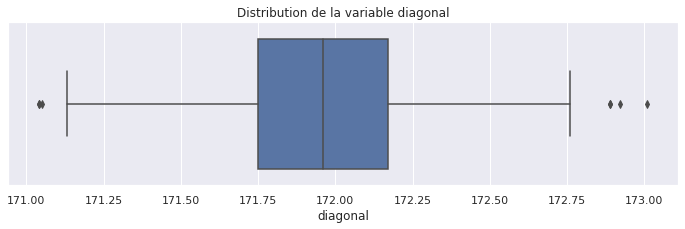

In [320]:
#Représentation la variable diagonal sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["diagonal"], color="b")
plt.title('Distribution de la variable diagonal')
plt.savefig("distribution_diagonal_boxplot.png")
plt.show

In [321]:
#détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
def liste_outliers(df, colonne):
  #1er quartile
  q1 = df[colonne].quantile(0.25)
  #3eme quartile
  q3 = df[colonne].quantile(0.75)
  #écart interquatile
  iqr = q3 - q1
  print('Ecart interquatile =', round(iqr,2))
  seuil_min = q1 -(1.5 * iqr) 
  seuil_max = q3 +(1.5 * iqr)
  print('Seuil minimum =', round(seuil_min,2))
  print('Seuil maximum =', round(seuil_max,2))

  #dataframe des outliers
  dfo = df[(df[colonne] < seuil_min) | (df[colonne] > seuil_max)]
  #liste des outliers
  liste_out=(dfo[colonne].tolist())
  print('Nombre doutliers:', len(liste_out))
  print('Liste des outliers :', liste_out)
  print('\n')

In [322]:
#affichage des outliers 
liste_outliers(df_billets, 'diagonal')

Ecart interquatile = 0.42
Seuil minimum = 171.12
Seuil maximum = 172.8
Nombre doutliers: 7
Liste des outliers : [171.04, 172.92, 172.89, 172.89, 171.04, 173.01, 171.05]




In [323]:
l=[171.04, 172.92, 172.89, 172.89, 171.04, 173.01, 171.05]
df_billets[df_billets['diagonal'].isin (l)].sort_values('diagonal')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b729,True,171.04,103.84,103.64,4.22,3.36,112.70
b1142,False,171.04,104.23,104.22,4.87,3.56,111.54
b1388,False,171.05,104.09,104.50,4.72,3.10,112.44
b842,True,172.89,103.77,104.24,4.12,3.01,113.72
b1022,False,172.89,104.03,104.03,6.03,3.00,110.95
b828,True,172.92,103.55,103.94,4.78,3.27,113.55
b1277,False,173.01,104.59,104.31,5.04,3.05,110.91


In [324]:
#df_outdiag=df_billets[df_billets['diagonal'].isin (l)]
#df_outdiag[['is_genuine', 'diagonal']].sort_values('diagonal')

On trouve 7 outliers pour la variable diagonal dont 3 vrais billets et 4 faux billets.

## <a name="C11"><font color='LightSeaGreen'>height_left</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

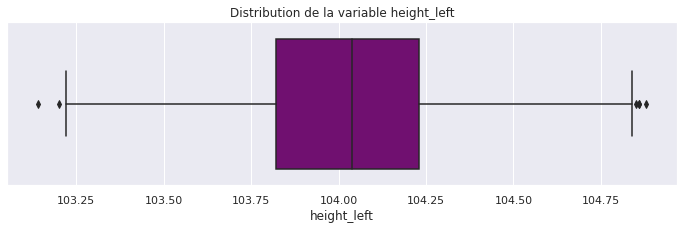

In [325]:
#Représentation la variable height_left sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["height_left"], color="purple")
plt.title('Distribution de la variable height_left')
plt.savefig("distribution_height_left_boxplot.png")
plt.show

In [326]:
#affichage des outliers 
liste_outliers(df_billets, 'height_left')

Ecart interquatile = 0.41
Seuil minimum = 103.2
Seuil maximum = 104.85
Nombre doutliers: 6
Liste des outliers : [104.86, 103.2, 103.14, 104.88, 104.86, 104.85]




In [327]:
l=[104.86, 103.2, 103.14, 104.88, 104.86, 104.85]
df_billets[df_billets['height_left'].isin (l)].sort_values('height_left')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b292,True,172.09,103.14,103.81,4.88,3.01,113.69
b224,True,172.12,103.20,103.92,4.46,3.26,113.44
b1382,False,171.97,104.85,104.52,5.87,3.56,110.98
b0,True,171.81,104.86,104.95,4.52,2.89,112.83
b1150,False,171.79,104.86,104.34,5.39,3.14,113.02
b1090,False,172.11,104.88,104.10,4.80,3.73,110.78


On trouve 6 outliers pour la variable height_left dont 3 vrais billets et 3 faux billets.

## <a name="C11"><font color='LightSeaGreen'>height_right</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

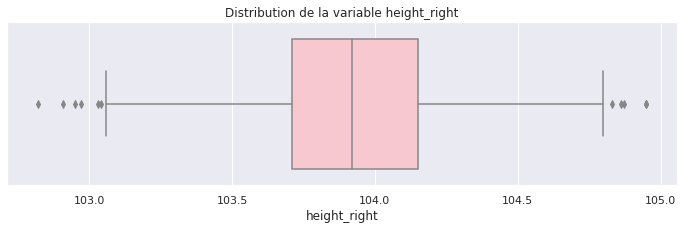

In [328]:
#Représentation la variable height_right sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["height_right"], color="pink")
plt.title('Distribution de la variable height_right')
plt.savefig("distribution_height_right_boxplot.png")
plt.show

In [329]:
#affichage des outliers 
liste_outliers(df_billets, 'height_right')

Ecart interquatile = 0.44
Seuil minimum = 103.05
Seuil maximum = 104.81
Nombre doutliers: 11
Liste des outliers : [104.95, 103.03, 102.97, 102.95, 102.82, 102.91, 103.04, 104.87, 104.86, 104.83, 104.95]




In [330]:
l=[104.95, 103.03, 102.97, 102.95, 102.82, 102.91, 103.04, 104.87, 104.86, 104.83, 104.95]
df_billets[df_billets['height_right'].isin (l)].sort_values('height_right')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b251,True,171.80,103.26,102.82,4.49,2.95,113.22
b522,True,172.02,104.42,102.91,3.86,3.12,113.43
b193,True,172.35,103.73,102.95,4.49,3.37,112.49
b176,True,171.75,103.63,102.97,4.46,2.77,113.22
b77,True,171.84,104.09,103.03,4.11,2.77,113.18
b761,True,172.16,103.93,103.04,4.14,2.99,113.26
b1331,False,172.32,104.60,104.83,4.84,3.51,112.55
b1321,False,172.29,104.72,104.86,5.71,3.16,112.15
b1199,False,172.03,104.32,104.87,4.49,3.77,111.04


Il y a 11 outliers pour la variable height_right dont 7 vrais billets et 4 faux billets.

## <a name="C11"><font color='LightSeaGreen'>margin_low</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

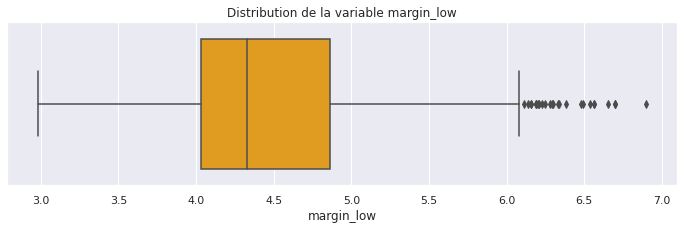

In [331]:
#Représentation la variable margin_low sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["margin_low"], color="orange")
plt.title('Distribution de la variable margin_low')
plt.savefig("distribution_margin_low_boxplot.png")
plt.show

In [332]:
#affichage des outliers 
liste_outliers(df_billets, 'margin_low')

Ecart interquatile = 0.83
Seuil minimum = 2.78
Seuil maximum = 6.1
Nombre doutliers: 26
Liste des outliers : [6.2, 6.7, 6.33, 6.65, 6.21, 6.23, 6.3, 6.56, 6.7, 6.16, 6.34, 6.48, 6.11, 6.14, 6.49, 6.9, 6.19, 6.16, 6.28, 6.19, 6.38, 6.25, 6.56, 6.19, 6.54, 6.29]




In [333]:
l=[6.2, 6.7, 6.33, 6.65, 6.21, 6.23, 6.3, 6.56, 6.7, 6.16, 6.34, 6.48, 6.11, 6.14, 6.49, 6.9, 6.19, 6.16, 6.28, 6.19, 6.38, 6.25, 6.56, 6.19, 6.54, 6.29]
df_billets[df_billets['margin_low'].isin (l)].sort_values('margin_low')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b1226,False,171.60,103.90,104.29,6.11,3.55,110.77
b1244,False,171.91,103.80,103.99,6.14,3.32,110.78
b1345,False,171.56,104.17,103.87,6.16,3.38,111.55
b1133,False,171.79,103.99,103.67,6.16,3.52,110.93
b1459,False,171.78,104.31,103.82,6.19,3.25,111.14
b1353,False,171.61,104.04,104.06,6.19,3.08,110.73
b1322,False,172.07,104.50,104.23,6.19,3.07,111.21
b1023,False,172.02,104.26,104.20,6.20,3.58,111.25
b1053,False,171.85,104.52,104.05,6.21,3.43,111.96


On trouve 26 outliers pour la variable margin_low qui sont tous de faux billets.

## <a name="C11"><font color='LightSeaGreen'>margin_up</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

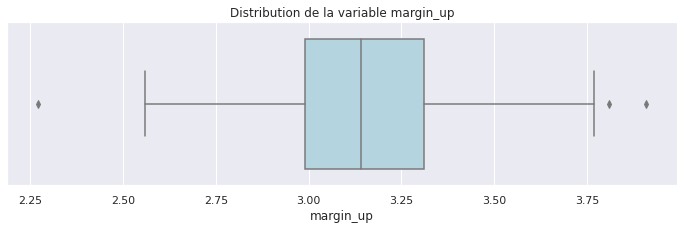

In [334]:
#Représentation la variable margin_up sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["margin_up"], color="lightblue")
plt.title('Distribution de la variable margin_up')
plt.savefig("distribution_margin_up_boxplot.png")
plt.show

In [335]:
#affichage des outliers 
liste_outliers(df_billets, 'margin_up')

Ecart interquatile = 0.32
Seuil minimum = 2.51
Seuil maximum = 3.79
Nombre doutliers: 3
Liste des outliers : [2.27, 3.91, 3.81]




In [336]:
l=[2.27, 3.91, 3.81]
df_billets[df_billets['margin_up'].isin (l)].sort_values('margin_up')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b664,True,172.05,103.70,103.75,5.04,2.27,113.55
b1270,False,171.26,104.22,104.07,4.78,3.81,112.88
b1029,False,171.96,104.29,104.03,6.01,3.91,110.83


On voit 3 outliers pour la variable margin_up dont 1 vrai billet et 2 faux billets.

## <a name="C11"><font color='LightSeaGreen'>length</font></a>

<function matplotlib.pyplot.show(*args, **kw)>

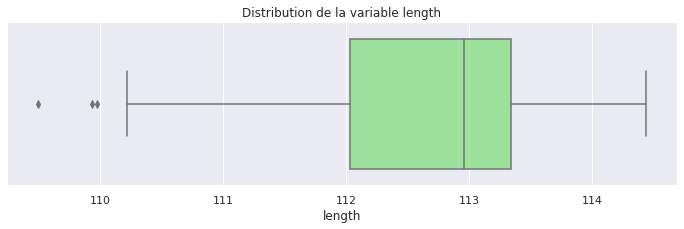

In [337]:
#Représentation la variable length sous forme de boxplot
plt.figure(figsize=(12, 3))
sns.set(style="darkgrid")
sns.boxplot(x=df_billets["length"], color="lightgreen")
plt.title('Distribution de la variable length')
plt.savefig("distribution_length_boxplot.png")
plt.show

In [338]:
#affichage des outliers 
liste_outliers(df_billets, 'length')

Ecart interquatile = 1.31
Seuil minimum = 110.06
Seuil maximum = 115.3
Nombre doutliers: 3
Liste des outliers : [109.49, 109.97, 109.93]




In [339]:
l=[109.49, 109.97, 109.93]
df_billets[df_billets['length'].isin (l)].sort_values('length')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
code_billet,,,,,,,
b1082,False,171.75,103.96,103.83,5.39,3.54,109.49
b1453,False,171.55,104.20,104.49,5.42,3.54,109.93
b1355,False,171.68,103.89,103.70,5.97,3.03,109.97


On voit 3 outliers pour la variable length qui sont tous de faux billets.

# **<font color='indianred'>Partie 4 : Analyse bivariée des variables</font>**

## <a name="C23"><font color='LightSeaGreen'>Matrice de corrélation</font></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


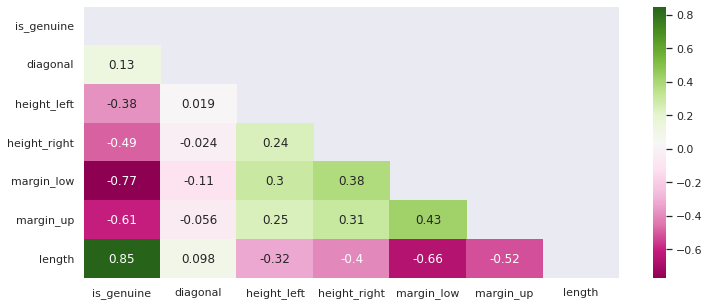

In [340]:
# Calculate pairwise-correlation
matrix = df_billets.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(12, 5))
sns.heatmap(matrix, mask=mask, annot=True, cmap='PiYG')
plt.savefig("matrice_corr.png")
plt.show()

## <a name="C26"><font color='LightSeaGreen'>K-Means</font></a>

###<font color='purple'>Centrage et Réduction</font>

In [341]:
# préparation des données pour le clustering
X = df_billets 
billets = df_billets.index
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

###<font color='purple'>Coefficient de silhouette</font>

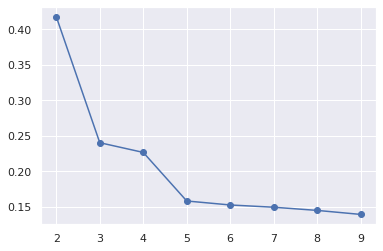

In [342]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 clusters pour tester toutes les possibilités de k
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = KMeans(n_clusters=k)  
    cls.fit(X_scaled)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.savefig('silhouette.png')
plt.show()

Le coefficient de silhouette nous indique une valeur de k=5.

###<font color='purple'>Méthode du coude</font>

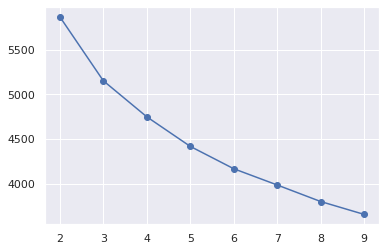

In [343]:
#Méthode du coude
#On crée une liste dans laquelle on stocke les inerties
inerties=[]

#On fait une boucle de 2 à 9 pour tester toutes ces possibiliéts
for k in range(2, 10):
    #pour chaque k, on crée un modèle et on l’ajuste
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    #on stocke l’inertie associée
    inerties.append(km.inertia_)

#Visualisation des valeurs d'inertie pour chaque nombre de cluster
plt.plot(range(2, 10), inerties, marker='o')

plt.savefig('coude.png')
plt.show()

Pas d'indication particulière sur le nombre de clusters à choisir

###<font color='purple'>Algorithme du Kmeans</font>

In [344]:
#Algorithme du Kmeans 
from sklearn.cluster import KMeans

# Création du modèle k-means 
kmeans = KMeans(n_clusters=2, n_init=20, init='k-means++', random_state=1)
kmeans.fit(X_scaled)

# Détermine à quel cluster appartient chaque point (kmeans.labels_)
clusters =  kmeans.predict(X_scaled)
clusters

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [345]:
#nombre d'individus (pays) dans chaque cluster
import numpy
numpy.unique(kmeans.labels_, return_counts=True)

(array([0, 1], dtype=int32), array([ 499, 1001]))

###<font color='purple'>Ajout de la colonne numéro de cluster </font>

In [346]:
#Ajout d'une nouvelle colonne qui affecte à chaque pays un numéro de cluster
df_km=df_billets.copy()
df_km['nocl'] = kmeans.labels_
df_km

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,nocl
code_billet,,,,,,,,
b0,True,171.81,104.86,104.95,4.52,2.89,112.83,0
b1,True,171.46,103.36,103.66,3.77,2.99,113.09,1
b2,True,172.69,104.48,103.50,4.40,2.94,113.16,1
b3,True,171.36,103.91,103.94,3.62,3.01,113.51,1
b4,True,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
b1495,False,171.75,104.38,104.17,4.42,3.09,111.28,0
b1496,False,172.19,104.63,104.44,5.27,3.37,110.97,0
b1497,False,171.80,104.01,104.12,5.51,3.36,111.95,0


In [347]:
df_km=df_km.reset_index()

###<font color='purple'>Affichage des pays de chaque cluster</font>

In [348]:
#Dataframe de chaque cluster
clusterkm0=df_km[df_km['nocl']==0]
clusterkm1=df_km[df_km['nocl']==1]
clusterkm2=df_km[df_km['nocl']==2]
clusterkm3=df_km[df_km['nocl']==3]
clusterkm4=df_km[df_km['nocl']==4]
clusterkm1.head()

,code_billet,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,nocl
1,b1,True,171.46,103.36,103.66,3.77,2.99,113.09,1
2,b2,True,172.69,104.48,103.50,4.40,2.94,113.16,1
3,b3,True,171.36,103.91,103.94,3.62,3.01,113.51,1
4,b4,True,171.73,104.28,103.46,4.04,3.48,112.54,1
5,b5,True,172.17,103.74,104.08,4.42,2.95,112.81,1


In [349]:
print('Cluster 0 :', 'Nombre de billets:', len(clusterkm0), clusterkm0.index.unique())
print('Cluster 1 :', 'Nombre de billets:', len(clusterkm1), clusterkm1.index.unique())

Cluster 0 : Nombre de billets: 499 Int64Index([   0, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008,
            ...
            1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499],
           dtype='int64', length=499)
Cluster 1 : Nombre de billets: 1001 Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
             992,  993,  994,  995,  996,  997,  998,  999, 1122, 1412],
           dtype='int64', length=1001)


###<font color='purple'>Visualisation des clusters par variable</font>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


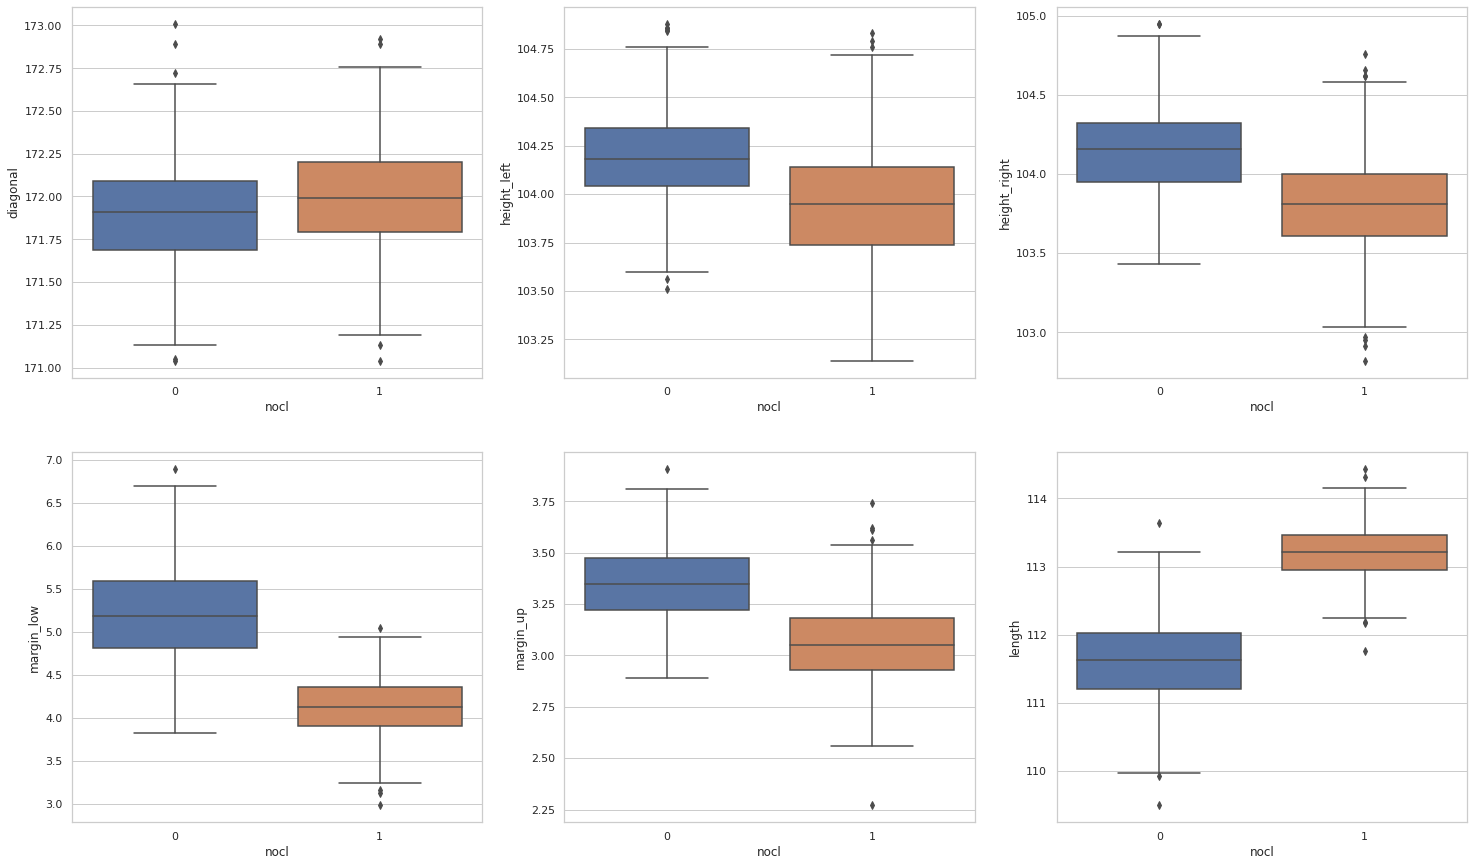

In [350]:
#Comparaison visuelle des clusters par boxplot
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")
plt.subplot(2, 3, 1)

plt.subplot(231)
sns.boxplot(data=df_km, x='nocl', y='diagonal')

plt.subplot(232)
sns.boxplot(data=df_km, x='nocl', y='height_left')

plt.subplot(233)
sns.boxplot(data=df_km, x='nocl', y='height_right')

plt.subplot(234)
sns.boxplot(data=df_km, x='nocl', y='margin_low')

plt.subplot(235)
sns.boxplot(data=df_km, x='nocl', y='margin_up')

plt.subplot(236)
sns.boxplot(data=df_km, x='nocl', y='length')

plt.savefig("boxplots.png")
plt.show()

Caractéristiques des VRAIS / FAUX BILLETS :
*   Les *faux* billets ont une ***hauteur*** (droite/gauche) et une ***marge*** (bas/haut) plus **grandes** que les vrais billets
*   Les *faux* billets ont une **longueur** plus **petite** que celles des *vrais* billets
*   Les *faux* billets ont une **diagonale** un peu plus petite que celles des *vrais* billets


###<font color='purple'>Centroides</font>

In [351]:
#Centroïdes des 5 clusters dans la forme centrée réduite
centroids = kmeans.cluster_centers_
df_cent=pd.DataFrame(centroids, columns=df_billets.columns).round(decimals = 2) 
df_cent

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,-1.41,-0.19,0.54,0.69,1.10,0.85,-1.21
1,0.70,0.10,-0.27,-0.35,-0.55,-0.43,0.60


###<font color='purple'>ClusterMap</font>

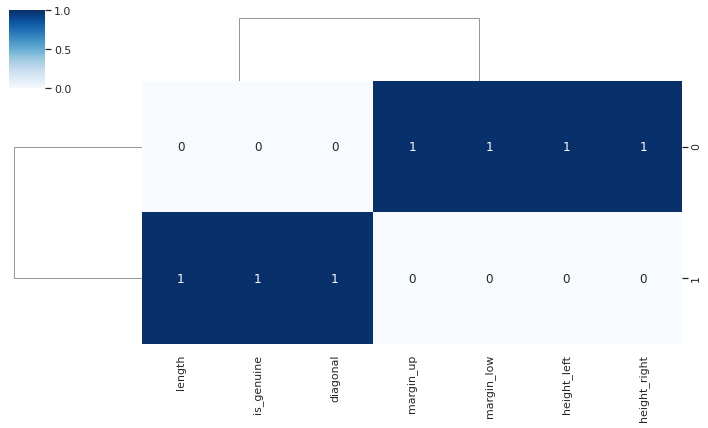

In [352]:
#Clustermap entre clusters et variables
sns.clustermap(df_cent, figsize=(10, 6), annot=True, standard_scale=1, cmap='Blues')
plt.savefig("clustermap.png")
plt.show()

## <a name="C27"><font color='LightSeaGreen'>Analyse en Composantes Principales (PCA)</font></a>

###<font color='purple'>Visualisation des clusters et variables sur un plan à 2 dimensions</font>

In [353]:
#df_billets=df_billets[['diagonal','height_left','height_right','margin_low','margin_up','length']]

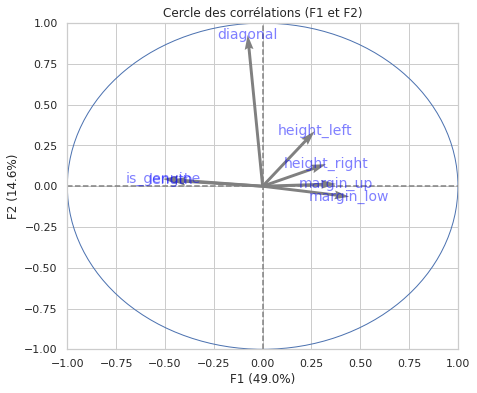

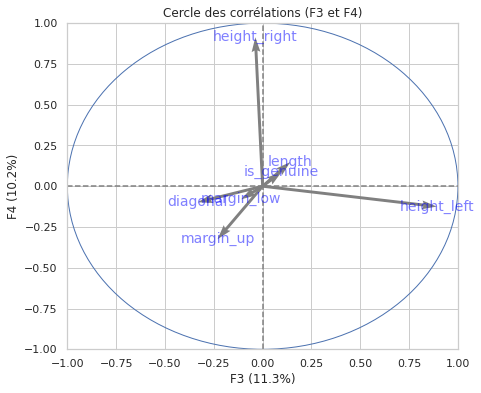

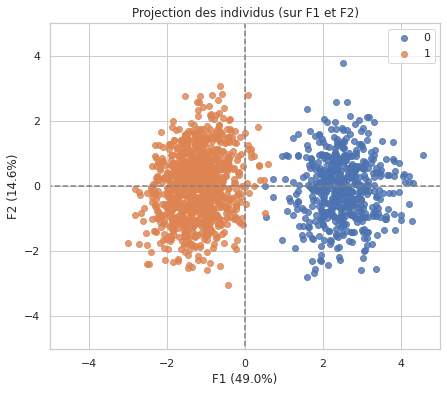

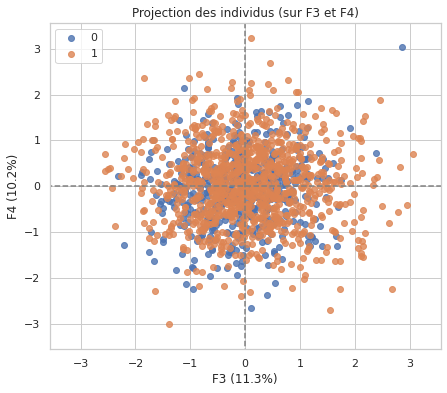

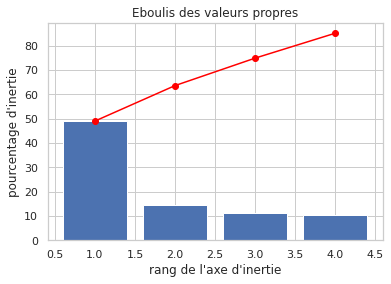

<Figure size 432x288 with 0 Axes>

In [354]:
from sklearn.decomposition import PCA
from sklearn import decomposition, preprocessing

n_comp=4

# Création du PCA pour réduire les données à 2 dimensions pour la visualisation
pca = PCA(n_components=n_comp)
pca.fit(X_scaled)

# Cercle des corrélations
from functions import display_circles
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(df_billets.columns))

# Projection des individus (nouvel espace vectoriel)
X_projected = pca.transform(X_scaled)

# Affiche un scatter plot des points des data dans le nouvel espace vectoriel
from functions import display_factorial_planes
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3)], labels=None, illustrative_var = clusters, alpha = 0.8)

# Eboulis des valeurs propres
from functions import display_scree_plot
display_scree_plot(pca)

plt.savefig("PCA.png")
plt.show()

In [355]:
#Pourcentage de variance expliquée par les composantes principales à l'aide de .explained_variance_ratio_
print(pca.explained_variance_ratio_.cumsum())

[0.49008369 0.63585155 0.74874801 0.85105866]


2 composantes sont suffisantes pour avoir au moins 60% de la variance.

###<font color='purple'>Projection des billets en 2 clusters sur F1 et F2</font>

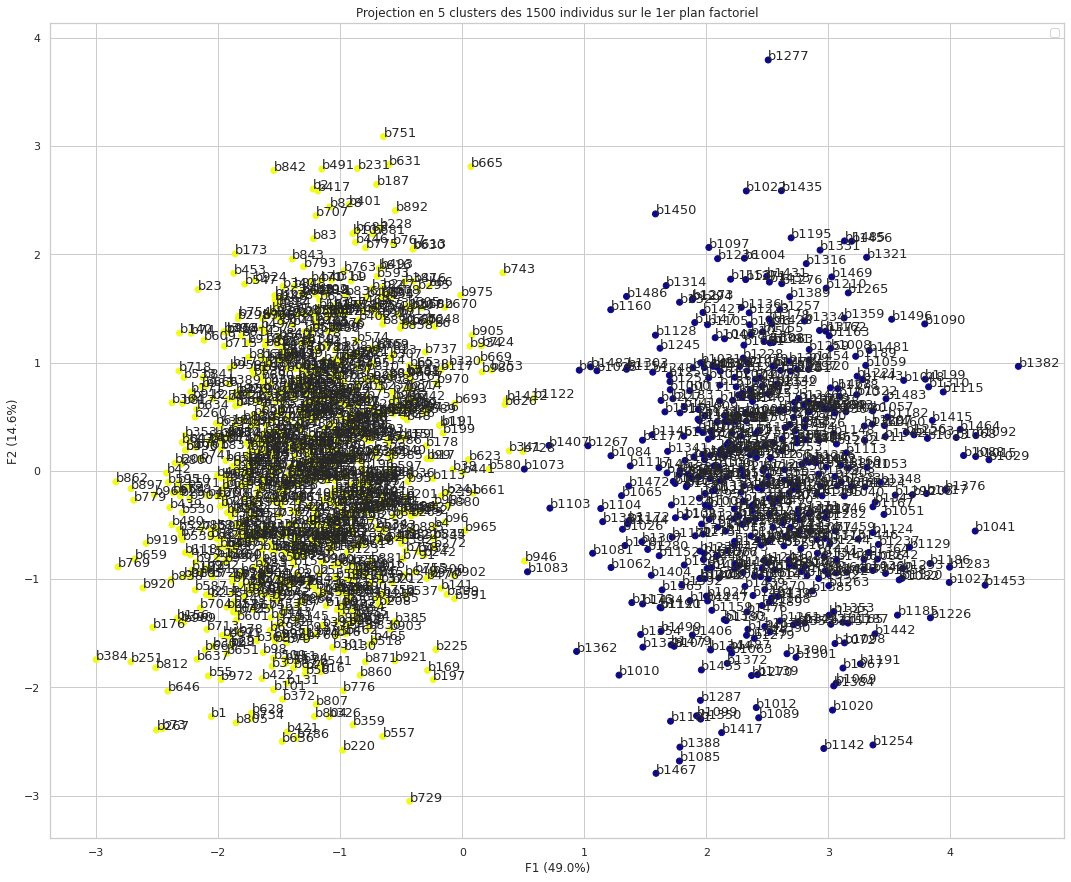

In [356]:
#Coordonnées factorielles 
plt.figure(figsize=(40, 15))
plt.subplot(121)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=kmeans.labels_, cmap='plasma')
for i,(x,y) in enumerate(X_projected[:,[0,1]]):
                    plt.text(x, y, df_billets.index[i], fontsize='13') 
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.title("Projection en 5 clusters des {} individus sur le 1er plan factoriel".format(X_projected.shape[0]))
plt.legend()
plt.savefig("projection_clusters.png")
plt.show()

###<font color='purple'>Calcul des composantes F1 et F2</font>

In [359]:
#Composantes F1 et F2 : coordonnées des pays sur l'espace vectoriel à 2 dimensions
df_comp_km = pd.DataFrame(X_projected, index=df_billets.index, columns=["F" + str(i+1) for i in range(4)]).iloc[:, :2].round (decimals = 2)
df_comp_km.head()

,F1,F2
code_billet,,
b0,0.96,0.93
b1,-2.06,-2.27
b2,-1.22,2.60
b3,-1.56,-1.80
b4,-0.23,-0.51
